<a href="https://colab.research.google.com/github/DexKev2/ModelosML/blob/main/Notebook/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# Define la ruta al archivo en tu Drive
url = 'https://raw.githubusercontent.com/DexKev2/ModelosML/refs/heads/main/DataSet/Mushroom.csv'
df = pd.read_csv(url)

In [3]:
df.head(1)

,id,CapShape,CapSurf,CapColor,Bruises,Odor,GillAtt,GillSpace,GillSize,GillColor,...,ScolorAbove,ScolorBelow,VeilType,VeilColor,RingNum,RingType,Spore,Pop,Habitat,classes
0,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


In [4]:
df_nuevo = df
df.columns

Index(['id', 'CapShape', 'CapSurf', 'CapColor', 'Bruises', 'Odor', 'GillAtt',
       'GillSpace', 'GillSize', 'GillColor', 'StalkShape', 'StalkRoot',
       'SsurfAbove', 'SsurfBelow', 'ScolorAbove', 'ScolorBelow', 'VeilType',
       'VeilColor', 'RingNum', 'RingType', 'Spore', 'Pop', 'Habitat',
       'classes'],
      dtype='object')

# Aplicación de Data Cleaning e Ingenieria de caracteristicas

## Eliminar columna de indice

In [5]:
df_nuevo = df_nuevo.drop('id', axis=1)


## Valores nulos

In [6]:
# Ver cantidad de nulos por columna
print(df_nuevo.isnull().sum())

CapShape         0
CapSurf          0
CapColor         0
Bruises          0
Odor             0
GillAtt          0
GillSpace        0
GillSize         0
GillColor        0
StalkShape       0
StalkRoot        0
SsurfAbove       0
SsurfBelow       0
ScolorAbove      0
ScolorBelow      0
VeilType         0
VeilColor        0
RingNum          0
RingType         0
Spore            0
Pop              0
Habitat          0
classes        100
dtype: int64


##### Se cuarda en un df a parte los datos cuya clase esta en nulo para probar despues si el modelo funciona y lo clasifica

In [11]:
# Filtrar las filas donde la columna 'classes' es nula
df_nuevo_Null = df_nuevo[df_nuevo['classes'].isnull()]


In [12]:
#Elimina las filas que tienen null
df_nuevo.dropna(inplace=True)

# Ver cantidad de nulos por columna de nuevo
print(df_nuevo.isnull().sum())

CapShape       0
CapSurf        0
CapColor       0
Bruises        0
Odor           0
GillAtt        0
GillSpace      0
GillSize       0
GillColor      0
StalkShape     0
StalkRoot      0
SsurfAbove     0
SsurfBelow     0
ScolorAbove    0
ScolorBelow    0
VeilType       0
VeilColor      0
RingNum        0
RingType       0
Spore          0
Pop            0
Habitat        0
classes        0
dtype: int64


# Análisis Básico de Datos e Ingeniería de Características:

In [14]:
# Conteo de valores por categoría por columnas
columnas_categoricas = df.select_dtypes(include='object').columns[:22]

for col in columnas_categoricas:
    print(f"--- Conteo de valores en la columna: {col} ---")
    print(df[col].value_counts())
    print("\n")

--- Conteo de valores en la columna: CapShape ---
CapShape
CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: count, dtype: int64


--- Conteo de valores en la columna: CapSurf ---
CapSurf
SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: count, dtype: int64


--- Conteo de valores en la columna: CapColor ---
CapColor
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: count, dtype: int64


--- Conteo de valores en la columna: Bruises ---
Bruises
NO         5040
BRUISES    3376
Name: count, dtype: int64


--- Conteo de valores en la columna: Odor ---
Odor
NONE        3808
FOUL        2160
SPICY        576
FISHY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: count, dtype: int64


--- Conteo de valores en la columna: GillAtt ---
GillAtt
FREE 


## Análisis de correlación:

### Matriz de correlación

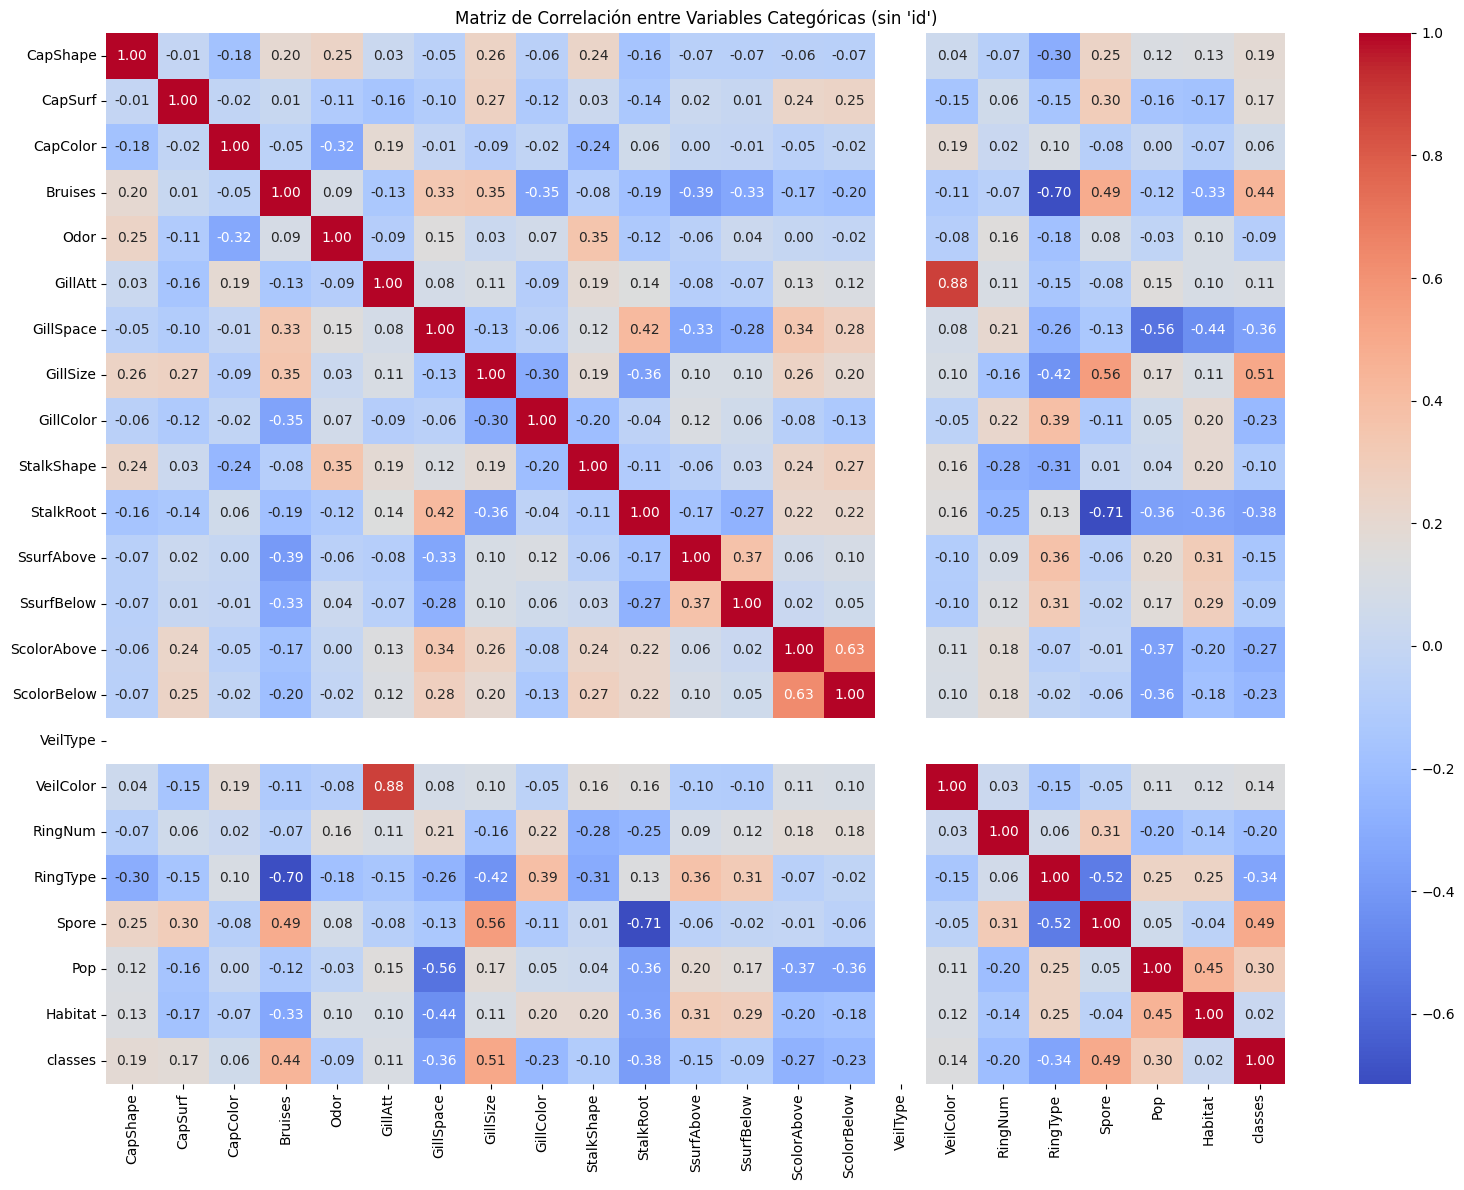

In [18]:
# Seleccionar solo columnas categóricas
df_categoricas = df.select_dtypes(include='object')

# Codificar todas las columnas categóricas
df_codificado = df_categoricas.copy()
le = LabelEncoder()
for col in df_codificado.columns:
    df_codificado[col] = le.fit_transform(df_codificado[col])

# Calcular la matriz de correlación
correlacion = df_codificado.corr()

# Graficar el mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Categóricas (sin 'id')")
plt.tight_layout()
plt.show()